In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aggregated_sessions.csv')
df

,install_date,event_date,country,platform,ad_network_name,campaign_name,ad_name,active_users,total_sessions,total_session_length,date_equal,Installs,days_since_install,source,Average_session,Average_session_length
0,01/09/2023,01/09/2023,US,android,Mintegral,US_Mintegral_android_campaign_2,US_Mintegral_android_campaign_2_ad_2,25,55,14758,True,25,0,Paid,2.200000,268.3272727
1,01/09/2023,01/09/2023,US,android,Organic,Organic,Organic,42,94,26398,True,42,0,Organic,2.238095,280.8297872
2,01/09/2023,01/09/2023,US,android,Unity,US_Unity_android_campaign_1,US_Unity_android_campaign_1_ad_2,50,99,64150,True,50,0,Paid,1.980000,647.979798
3,01/09/2023,01/09/2023,US,ios,Mintegral,US_Mintegral_ios_campaign_1,US_Mintegral_ios_campaign_1_ad_1,4,6,1706,True,4,0,Paid,1.500000,284.3333333
4,01/09/2023,01/09/2023,US,ios,Mintegral,US_Mintegral_ios_campaign_1,US_Mintegral_ios_campaign_1_ad_2,274,486,219250,True,274,0,Paid,1.773723,451.1316872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,14/09/2023,14/09/2023,US,ios,Organic,Organic,Organic,82,142,47888,True,82,0,Organic,1.731707,NaN
1058,14/09/2023,14/09/2023,US,ios,ironSource,US_ironSource_ios_campaign_1,US_ironSource_ios_campaign_1_ad_1,28,48,14613,True,28,0,Paid,1.714286,NaN
1059,14/09/2023,14/09/2023,US,ios,ironSource,US_ironSource_ios_campaign_1,US_ironSource_ios_campaign_1_ad_2,9,12,4063,True,9,0,Paid,1.333333,NaN
1060,14/09/2023,14/09/2023,US,ios,ironSource,US_ironSource_ios_campaign_1,US_ironSource_ios_campaign_1_ad_3,115,194,63269,True,115,0,Paid,1.686957,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   install_date            1062 non-null   object 
 1   event_date              1062 non-null   object 
 2   country                 1062 non-null   object 
 3   platform                1062 non-null   object 
 4   ad_network_name         1062 non-null   object 
 5   campaign_name           1062 non-null   object 
 6   ad_name                 1062 non-null   object 
 7   active_users            1062 non-null   int64  
 8   total_sessions          1062 non-null   int64  
 9   total_session_length    1062 non-null   int64  
 10  date_equal              1062 non-null   bool   
 11  Installs                1062 non-null   int64  
 12  days_since_install      1062 non-null   object 
 13  source                  1062 non-null   object 
 14  Average_session         1062 non-null   

In [4]:
df.describe()

,active_users,total_sessions,total_session_length,Installs,Average_session
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,16.457627,30.379473,10008.510358,9.416196,1.639821
std,42.409493,81.727024,30875.308469,41.606161,0.628248
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,3.000000,555.250000,0.000000,1.000000
50%,5.000000,7.000000,1825.500000,0.000000,1.555556
75%,13.000000,24.000000,6663.750000,0.000000,2.000000
max,612.000000,1233.000000,476567.000000,612.000000,8.000000


In [5]:
def duplicated_values(x):
    print("Total_number_of_duplicated_data = ",x.duplicated().sum())
duplicated_values(df)

Total_number_of_duplicated_data =  0


In [6]:
print("Shape of the dataframe :",df.shape)

Shape of the dataframe : (1062, 16)


In [7]:
df['ad_network_name'].value_counts()

ad_network_name
Mintegral     429
ironSource    366
Organic       187
Unity          80
Name: count, dtype: int64

In [8]:
def categorize_ad_network(ad_network):
    if ad_network == 'Organic':
        return 'Organic' 
    else :
        return 'Paid'

df['Source'] = df['ad_network_name'].apply(categorize_ad_network)


In [9]:
df['Source'].value_counts()

Source
Paid       875
Organic    187
Name: count, dtype: int64

In [10]:
def create_new_column(row):

    if row['install_date'] == row['event_date']:
        return row['active_users'] 
    else :
        return 0


df['Installs'] = df.apply(create_new_column, axis=1)


In [11]:
df

,install_date,event_date,country,platform,ad_network_name,campaign_name,ad_name,active_users,total_sessions,total_session_length,date_equal,Installs,days_since_install,source,Average_session,Average_session_length,Source
0,01/09/2023,01/09/2023,US,android,Mintegral,US_Mintegral_android_campaign_2,US_Mintegral_android_campaign_2_ad_2,25,55,14758,True,25,0,Paid,2.200000,268.3272727,Paid
1,01/09/2023,01/09/2023,US,android,Organic,Organic,Organic,42,94,26398,True,42,0,Organic,2.238095,280.8297872,Organic
2,01/09/2023,01/09/2023,US,android,Unity,US_Unity_android_campaign_1,US_Unity_android_campaign_1_ad_2,50,99,64150,True,50,0,Paid,1.980000,647.979798,Paid
3,01/09/2023,01/09/2023,US,ios,Mintegral,US_Mintegral_ios_campaign_1,US_Mintegral_ios_campaign_1_ad_1,4,6,1706,True,4,0,Paid,1.500000,284.3333333,Paid
4,01/09/2023,01/09/2023,US,ios,Mintegral,US_Mintegral_ios_campaign_1,US_Mintegral_ios_campaign_1_ad_2,274,486,219250,True,274,0,Paid,1.773723,451.1316872,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,14/09/2023,14/09/2023,US,ios,Organic,Organic,Organic,82,142,47888,True,82,0,Organic,1.731707,NaN,Organic
1058,14/09/2023,14/09/2023,US,ios,ironSource,US_ironSource_ios_campaign_1,US_ironSource_ios_campaign_1_ad_1,28,48,14613,True,28,0,Paid,1.714286,NaN,Paid
1059,14/09/2023,14/09/2023,US,ios,ironSource,US_ironSource_ios_campaign_1,US_ironSource_ios_campaign_1_ad_2,9,12,4063,True,9,0,Paid,1.333333,NaN,Paid
1060,14/09/2023,14/09/2023,US,ios,ironSource,US_ironSource_ios_campaign_1,US_ironSource_ios_campaign_1_ad_3,115,194,63269,True,115,0,Paid,1.686957,NaN,Paid


In [12]:
df['Installs'].sum()

10000

Q1 Installs: The number of players who install the game (you may assume installs are the number of active_users when install_date = event_date).


In [13]:
Paid_installs = df[df['Source'] == 'Paid']['Installs'].sum()

organic_installs = df[df['Source'] == 'Organic']['Installs'].sum()

print(organic_installs, Paid_installs)

1969 8031


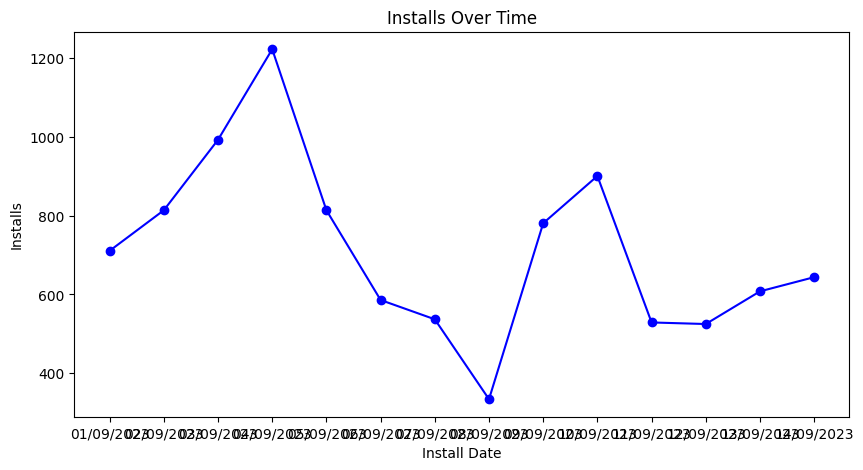

In [14]:
plt.figure(figsize=(10, 5))

tot_install = df.groupby('install_date')['Installs'].sum().reset_index()
tot_install

plt.plot(tot_install['install_date'], tot_install['Installs'], marker='o', linestyle='-', color='blue')


# Adding labels and title
plt.xlabel('Install Date')
plt.ylabel('Installs')
plt.title('Installs Over Time')

# Display the plot
plt.show()


In [15]:
Average_people_downloads_each_day = (df['Installs'].sum()/df['install_date'].nunique())
Average_people_downloads_each_day

714.2857142857143

Q2 Daily Active Users: The number of players who are active in the game on a given day.

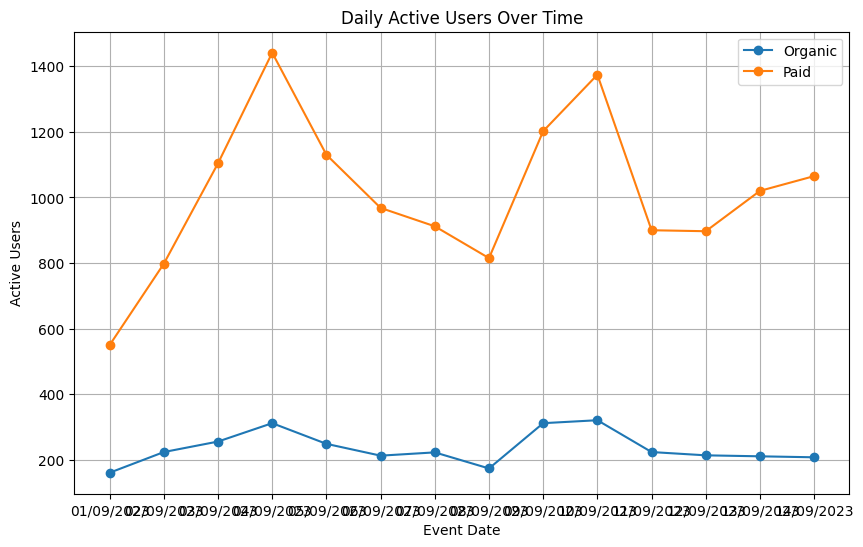

In [16]:
df_paid = df[df['Source'] == 'Paid']
df_organic = df[df['Source'] == 'Organic']

daily_active_users_organic = df_organic.groupby('event_date')['active_users'].sum().reset_index()
daily_active_users_paid = df_paid.groupby('event_date')['active_users'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(daily_active_users_organic['event_date'], daily_active_users_organic['active_users'], label='Organic', marker='o')
plt.plot(daily_active_users_paid['event_date'], daily_active_users_paid['active_users'], label='Paid', marker='o')
plt.title('Daily Active Users Over Time')
plt.xlabel('Event Date')
plt.ylabel('Active Users')
plt.legend()
plt.grid(True)
plt.show()


Q3 Retention: The proportion of players who return exactly “X” days after install, e.g Day 7 retention = 10% means 10% of players returned on the 7th day after installing.


 Overall retention

In [17]:
df['install_date'] = pd.to_datetime(df['install_date'], format='%d/%m/%Y')
df['event_date'] = pd.to_datetime(df['event_date'], format='%d/%m/%Y')
df['days_since_install'] = (df['event_date'] - df['install_date']).dt.days

grouped_df = df.groupby(['install_date', 'days_since_install'])['active_users'].sum().reset_index()
retention = grouped_df.pivot(index='install_date', columns='days_since_install', values='active_users')
retention.loc['Grand Total'] = retention.sum()
retention


days_since_install,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
install_date,,,,,,,,,,,,,,,
2023-09-01 00:00:00,NaN,711.0,208.0,110.0,95.0,70.0,28.0,43.0,41.0,35.0,22.0,26.0,23.0,19.0,15.0
2023-09-02 00:00:00,NaN,814.0,257.0,133.0,74.0,61.0,50.0,47.0,63.0,54.0,25.0,19.0,21.0,14.0,NaN
2023-09-03 00:00:00,NaN,993.0,302.0,115.0,103.0,67.0,53.0,73.0,77.0,31.0,31.0,28.0,22.0,NaN,NaN
2023-09-04 00:00:00,NaN,1223.0,306.0,165.0,125.0,118.0,123.0,94.0,41.0,37.0,35.0,38.0,NaN,NaN,NaN
2023-09-05 00:00:00,NaN,814.0,238.0,141.0,123.0,89.0,77.0,48.0,37.0,38.0,34.0,NaN,NaN,NaN,NaN
2023-09-06 00:00:00,NaN,586.0,172.0,103.0,106.0,53.0,37.0,33.0,28.0,21.0,NaN,NaN,NaN,NaN,NaN
2023-09-07 00:00:00,NaN,537.0,167.0,104.0,81.0,43.0,32.0,31.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-08 00:00:00,NaN,334.0,136.0,76.0,40.0,28.0,23.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-09 00:00:00,3.0,781.0,259.0,106.0,92.0,56.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
overall_retention_transpose = retention.transpose().reset_index()
overall_retention_transpose = overall_retention_transpose[['days_since_install', 'Grand Total']]
overall_retention_transpose = overall_retention_transpose[1::]
overall_retention_transpose['Percentage'] = (overall_retention_transpose['Grand Total'] / overall_retention_transpose['Grand Total'].iloc[0] * 100)
overall_retention_transpose

install_date,days_since_install,Grand Total,Percentage
1,0,10000.0,100.00
2,1,2725.0,27.25
3,2,1345.0,13.45
4,3,989.0,9.89
5,4,644.0,6.44
6,5,477.0,4.77
7,6,391.0,3.91
8,7,311.0,3.11
9,8,216.0,2.16
10,9,147.0,1.47


Retention for paid and organic

In [19]:
paid_df = df[df['Source'] == 'Paid']

paid_df['install_date'] = pd.to_datetime(paid_df['install_date'])
paid_df['event_date'] = pd.to_datetime(paid_df['event_date'])
paid_df['days_since_install'] = (paid_df['event_date'] - paid_df['install_date']).dt.days
grouped_df = paid_df.groupby(['install_date', 'days_since_install'])['active_users'].sum().reset_index()
paid_retention = grouped_df.pivot(index='install_date', columns='days_since_install', values='active_users')
paid_retention.loc['Grand Total'] = paid_retention.sum()

paid_retention = paid_retention.transpose().reset_index()
paid_retention = paid_retention[['days_since_install', 'Grand Total']]
paid_retention = paid_retention[1::]
paid_retention['Percentage'] = (paid_retention['Grand Total'] / paid_retention['Grand Total'].iloc[0] * 100)
paid_retention


/var/folders/5r/9d6xkrmx0pl5rsn1dlnhjg0h0000gn/T/ipykernel_2730/2846898605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['install_date'] = pd.to_datetime(paid_df['install_date'])
/var/folders/5r/9d6xkrmx0pl5rsn1dlnhjg0h0000gn/T/ipykernel_2730/2846898605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['event_date'] = pd.to_datetime(paid_df['event_date'])
/var/folders/5r/9d6xkrmx0pl5rsn1dlnhjg0h0000gn/T/ipykernel_2730/2846898605.py:5: SettingWithCopyWarning: 
A value is trying to be 

install_date,days_since_install,Grand Total,Percentage
1,0,8031.0,100.000000
2,1,2263.0,28.178309
3,2,1099.0,13.684473
4,3,824.0,10.260242
5,4,528.0,6.574524
6,5,397.0,4.943345
7,6,317.0,3.947205
8,7,245.0,3.050679
9,8,174.0,2.166604
10,9,119.0,1.481758


In [20]:
organic_df = df[df['Source'] == 'Organic']

organic_df['install_date'] = pd.to_datetime(organic_df['install_date'])
organic_df['event_date'] = pd.to_datetime(organic_df['event_date'])
organic_df['days_since_install'] = (organic_df['event_date'] - organic_df['install_date']).dt.days
grouped_df = organic_df.groupby(['install_date', 'days_since_install'])['active_users'].sum().reset_index()
organic_retention = grouped_df.pivot(index='install_date', columns='days_since_install', values='active_users')
organic_retention.loc['Grand Total'] = organic_retention.sum()


organic_retention = organic_retention.transpose().reset_index()
organic_retention = organic_retention[['days_since_install', 'Grand Total']]
organic_retention = organic_retention[1::]
organic_retention['Percentage'] = (organic_retention['Grand Total'] / organic_retention['Grand Total'].iloc[0] * 100)
organic_retention

/var/folders/5r/9d6xkrmx0pl5rsn1dlnhjg0h0000gn/T/ipykernel_2730/1021046510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_df['install_date'] = pd.to_datetime(organic_df['install_date'])
/var/folders/5r/9d6xkrmx0pl5rsn1dlnhjg0h0000gn/T/ipykernel_2730/1021046510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_df['event_date'] = pd.to_datetime(organic_df['event_date'])
/var/folders/5r/9d6xkrmx0pl5rsn1dlnhjg0h0000gn/T/ipykernel_2730/1021046510.py:5: SettingWithCopyWarning: 
A value is t

install_date,days_since_install,Grand Total,Percentage
1,0,1969.0,100.000000
2,1,462.0,23.463687
3,2,246.0,12.493652
4,3,165.0,8.379888
5,4,116.0,5.891315
6,5,80.0,4.062976
7,6,74.0,3.758253
8,7,66.0,3.351955
9,8,42.0,2.133062
10,9,28.0,1.422042


In [21]:
retention_final = pd.merge(paid_retention, organic_retention, on='days_since_install')
retention_final = retention_final[['Percentage_x','Percentage_y']]
retention_final = retention_final.rename(columns={'Percentage_x': 'Paid', 'Percentage_y': 'Organic'})
retention_final = retention_final.round(2)

retention_final

install_date,Paid,Organic
0,100.00,100.00
1,28.18,23.46
2,13.68,12.49
3,10.26,8.38
4,6.57,5.89
5,4.94,4.06
6,3.95,3.76
7,3.05,3.35
8,2.17,2.13
9,1.48,1.42


Q4 Average Session Count: The average number of sessions a player was active in across a period of time.


In [22]:
avg_session_count_organic = df_organic['total_sessions'].mean()
avg_session_count_paid = df_paid['total_sessions'].mean()
print(avg_session_count_organic,avg_session_count_paid)

32.962566844919785 29.827428571428573


In [23]:

grouped_df_organic = df_organic.groupby('event_date')[['total_sessions', 'active_users']].sum().reset_index()
grouped_df_organic['Average_session_per_person_organic'] =  grouped_df_organic['total_sessions']/grouped_df_organic['active_users']

grouped_df_paid = df_paid.groupby('event_date')[['total_sessions', 'active_users']].sum().reset_index()
grouped_df_paid['Average_session_per_person_paid'] =  grouped_df_paid['total_sessions']/grouped_df_paid['active_users']

Average_session_count = pd.merge(grouped_df_organic, grouped_df_paid, on='event_date')
Average_session_count = Average_session_count[['event_date','Average_session_per_person_organic','Average_session_per_person_paid']].round(2)

Average_session_count



,event_date,Average_session_per_person_organic,Average_session_per_person_paid
0,01/09/2023,2.06,1.97
1,02/09/2023,2.04,1.96
2,03/09/2023,2.19,1.92
3,04/09/2023,1.98,2.01
4,05/09/2023,1.80,1.86
5,06/09/2023,1.86,1.80
6,07/09/2023,1.78,1.85
7,08/09/2023,1.84,1.75
8,09/09/2023,1.79,1.83
9,10/09/2023,1.86,1.85


Q5 Average Session Length: The average length of time a player was active in across a period of time.


In [24]:
avg_session_length_organic = df_organic['total_session_length'].mean()
avg_session_length_paid = df_paid['total_session_length'].mean()

print(avg_session_length_organic,avg_session_length_paid)

10718.048128342247 9856.872


In [25]:
grouped_df_organic = df_organic.groupby('event_date')[['total_session_length', 'active_users']].sum().reset_index()
grouped_df_organic['Average_session_length_per_person_organic'] =  grouped_df_organic['total_session_length']/grouped_df_organic['active_users']

grouped_df_paid = df_paid.groupby('event_date')[['total_session_length', 'active_users']].sum().reset_index()
grouped_df_paid['Average_session_length_per_person_paid'] =  grouped_df_paid['total_session_length']/grouped_df_paid['active_users']

Average_session_length_count = pd.merge(grouped_df_organic, grouped_df_paid, on='event_date')
Average_session_length_count = Average_session_length_count[['event_date','Average_session_length_per_person_organic','Average_session_length_per_person_paid']].round(2)

Average_session_length_count


,event_date,Average_session_length_per_person_organic,Average_session_length_per_person_paid
0,01/09/2023,591.02,789.07
1,02/09/2023,624.39,690.00
2,03/09/2023,786.96,625.63
3,04/09/2023,729.95,695.65
4,05/09/2023,659.79,631.47
5,06/09/2023,531.41,578.48
6,07/09/2023,510.16,525.21
7,08/09/2023,743.57,589.14
8,09/09/2023,566.35,609.17
9,10/09/2023,520.47,617.11


Further analysis

In [26]:
df['platform'].value_counts()

platform
ios        846
android    216
Name: count, dtype: int64

In [27]:
tot_no_of_installs_platform = df.groupby('platform')['Installs'].sum()
tot_no_of_installs_platform

platform
android    1108
ios        8892
Name: Installs, dtype: int64

In [28]:
tot_no_of_installs_by_campaign = df.groupby('ad_network_name')['Installs'].sum()
tot_no_of_installs_by_campaign

ad_network_name
Mintegral     5243
Organic       1969
Unity          469
ironSource    2319
Name: Installs, dtype: int64